||B - B_k||F = 129.57121750972036
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


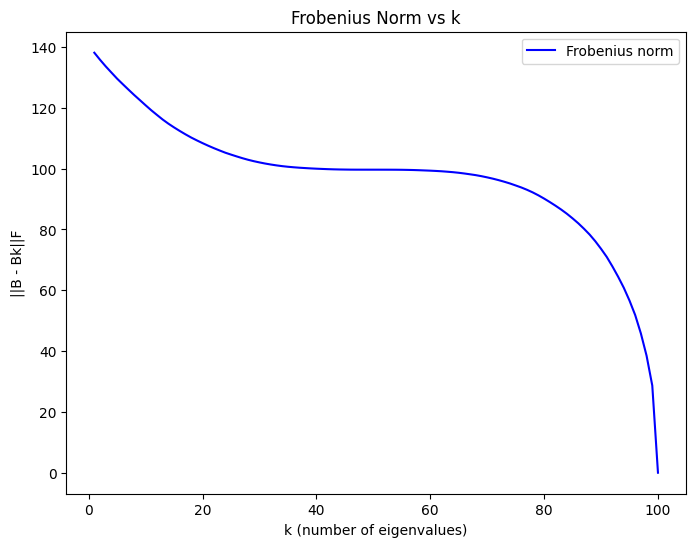

||V^T V - I||_F = 2.0877721339710512e-14


/var/folders/f_/_06tnpvn1l7gnknsb04y2djc0000gn/T/ipykernel_92694/3665406317.py:65: RuntimeWarning: divide by zero encountered in matmul
  orthogonality_error = np.linalg.norm(eigenvectors.T @ eigenvectors - I, 'fro')
/var/folders/f_/_06tnpvn1l7gnknsb04y2djc0000gn/T/ipykernel_92694/3665406317.py:65: RuntimeWarning: overflow encountered in matmul
  orthogonality_error = np.linalg.norm(eigenvectors.T @ eigenvectors - I, 'fro')
/var/folders/f_/_06tnpvn1l7gnknsb04y2djc0000gn/T/ipykernel_92694/3665406317.py:65: RuntimeWarning: invalid value encountered in matmul
  orthogonality_error = np.linalg.norm(eigenvectors.T @ eigenvectors - I, 'fro')


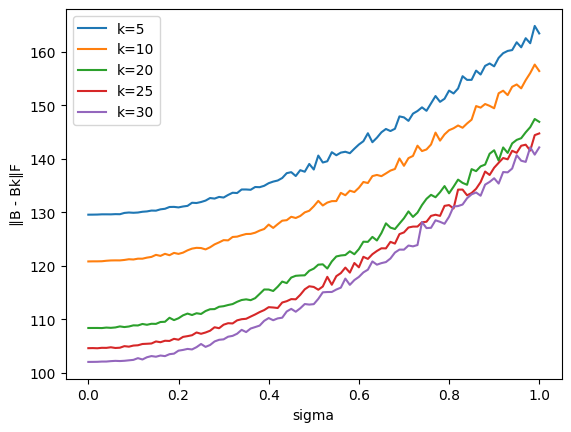

In [79]:
import numpy as np
import matplotlib.pyplot as plt


n = 100
A = np.random.normal(0, 1, (n, n))

B = A + A.T

eigenvalues, eigenvectors = np.linalg.eigh(B)

index = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[index]
eigenvectors = eigenvectors[:, index]

Diagonal = np.diag(eigenvalues)


# (b)
def b_k(k, eigenvalue, eigenvector):

    b = np.zeros((eigenvector.shape[0], eigenvector.shape[0]))
    for i in range(k):
        v = eigenvector[:, i:i+1] 
        b += eigenvalue[i] * (v @ v.T)
    return b


def frobenius_norm(B, b):
    diff = B - b
    norm = np.sqrt(np.sum(np.square(diff)))
    return norm

k = int(input('enter k'))
B_k = b_k(k, eigenvalues, eigenvectors)
print(f"||B - B_k||F = {frobenius_norm(B, B_k)}")



# (c)

k = []
for i in range(1,101):
    k.append(i)

print(k)


frob = []
for i in k:
    B_k = b_k(i, eigenvalues, eigenvectors)
    frob.append(frobenius_norm(B, B_k))

plt.figure(figsize=(8, 6))
plt.plot(k, frob, 'b-', label='Frobenius norm')
plt.xlabel('k (number of eigenvalues)')
plt.ylabel('||B - Bk||F')
plt.title('Frobenius Norm vs k')
plt.legend()
plt.show()


# (d)
I = np.eye(n)
orthogonality_error = np.linalg.norm(eigenvectors.T @ eigenvectors - I, 'fro')
print("||V^T V - I||_F =", orthogonality_error)

# (e)
sigma_square= np.arange(101)/10**2
k = [5,10,20,25,30]


def plot_frobenius_vs_sigma(B, eigenvalue, eigenvector, k, sigma_square):
    for ki in k:
        frob = []
        for sigma in sigma_square:
            noisy_B = B + np.random.normal(0, sigma, B.shape)
            B_k = b_k(ki, eigenvalue, eigenvector)
            frob.append(frobenius_norm(noisy_B, B_k))
        plt.plot(sigma_square, frob, label=f'k={ki}')
    plt.xlabel('sigma')
    plt.ylabel('∥B - Bk∥F')
    plt.legend()
    plt.show()

plot_frobenius_vs_sigma(B, eigenvalues, eigenvectors, k, sigma_square)